#algerian-forest-fires-prediction-regression</h1></font>

In [1]:
# Import the required library
#import os

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

print("All the libraries loaded successfully")

All the libraries loaded successfully


> The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012.
- The dataset includes 11 attributes and 1 output attribute (class)
- The 244 instances have been classified into 'fire' (138 classes) and 'not fire' (106 classes) classes.

> Attribute Information:

- 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- 2. Weather data observations 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
- 3. RH : Relative Humidity in %: 21 to 90 
- 4. Ws :Wind speed in km/h: 6 to 29 
- 5. Rain: total day in mm: 0 to 16.8 FWI Components 
- 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
- 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
- 8. Drought Code (DC) index from the FWI system: 7 to 220.4 
- 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
- 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
- 11. Fire Weather Index (FWI) Index: 0 to 31.1 
- 12. Classes: two classes, namely Fire and not Fire

In [5]:
# read the dataset 
df = pd.read_csv("data/Algerian_forest_fires_dataset_update.csv")

In [7]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [9]:
df.shape

(246, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(10), object(4)
memory usage: 27.0+ KB


# Data Cleaning 

In [14]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
df.drop([122,123],axis=0,inplace=True)

In [20]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [22]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(11), object(4)
memory usage: 38.6+ KB


In [25]:
df['Region'] = df['Region'].astype('int')

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df = df.dropna().reset_index(drop=True)

In [32]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [34]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [36]:
df=df.drop(122).reset_index(drop=True)

In [38]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [40]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [41]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    object 
 1   month        242 non-null    float64
 2   year         242 non-null    float64
 3   Temperature  242 non-null    float64
 4   RH           242 non-null    float64
 5   Ws           242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    object 
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    object 
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(10), int32(1), object(4)
memory usage: 27.5+ KB


In [46]:
# Change data types (required cols as integers, Month,year,temperature,rh,ws)
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype('int')

In [48]:
# Changing the other columns to float dataframe 

In [50]:
[features for features in df.columns if df[features].dtypes=='O']

['DC', 'FWI', 'Classes']

In [52]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [54]:
objects

['DC', 'FWI', 'Classes']

In [56]:
for i in objects:
    if i !='Classes':
        df[i]=df[i].astype('float')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [60]:
# Cleaned dataset 
#df.to_csv("Algerian_Forrest_Fires_cleaned_dataset.csv",index=False)

# Exploratory Data Analysis

> Diagnose the cleaned dataframe 

In [65]:
def diagnose_dataframe(df, verbose=True):
  """
  Performs various initial inspections on a pandas dataframe and provides details.

  Args:
    df: The pandas dataframe to diagnose.
    verbose: Whether to print details for each inspection.

  Returns:
    A dictionary containing the results of the inspections.
  """

  results = {}

  # Basic information
  results["shape"] = df.shape
  results["columns"] = list(df.columns)
  results["dtypes"] = df.dtypes.to_dict()
  results["null_counts"] = df.isnull().sum().to_dict()

  # Descriptive statistics
  results["describe"] = df.describe(include='all')

  # Unique values and counts
  for col in df.columns:
    results[f"unique_values_{col}"] = df[col].unique()
    results[f"value_counts_{col}"] = df[col].value_counts().to_dict()

  # Missing value analysis
  missing_values_pct = (df.isnull().sum() / df.shape[0]) * 100
  results["missing_values_pct"] = missing_values_pct.to_dict()
  missing_values_threshold = 0.5  # Set a threshold for high missing value percentage
  high_missing_values = missing_values_pct[missing_values_pct > missing_values_threshold]
  results["high_missing_values"] = list(high_missing_values.index)

  # Duplicate rows
  duplicate_rows = df[df.duplicated()]
  results["duplicate_rows_count"] = len(duplicate_rows)

  # Outlier analysis
  # ... (implement your own outlier analysis strategy)

  if verbose:
    for key, value in results.items():
      print(f"\n{key}:\n{value}")

  return results

In [67]:
#diagnose_dataframe(df)

In [69]:
df1 = df.drop(columns=['day','month','year'],axis=1)

In [71]:
df1.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [72]:
## Encode categories in classes
df1['Classes']= np.where(df1['Classes'].str.contains("not fire"),0,1)

In [75]:
df1['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

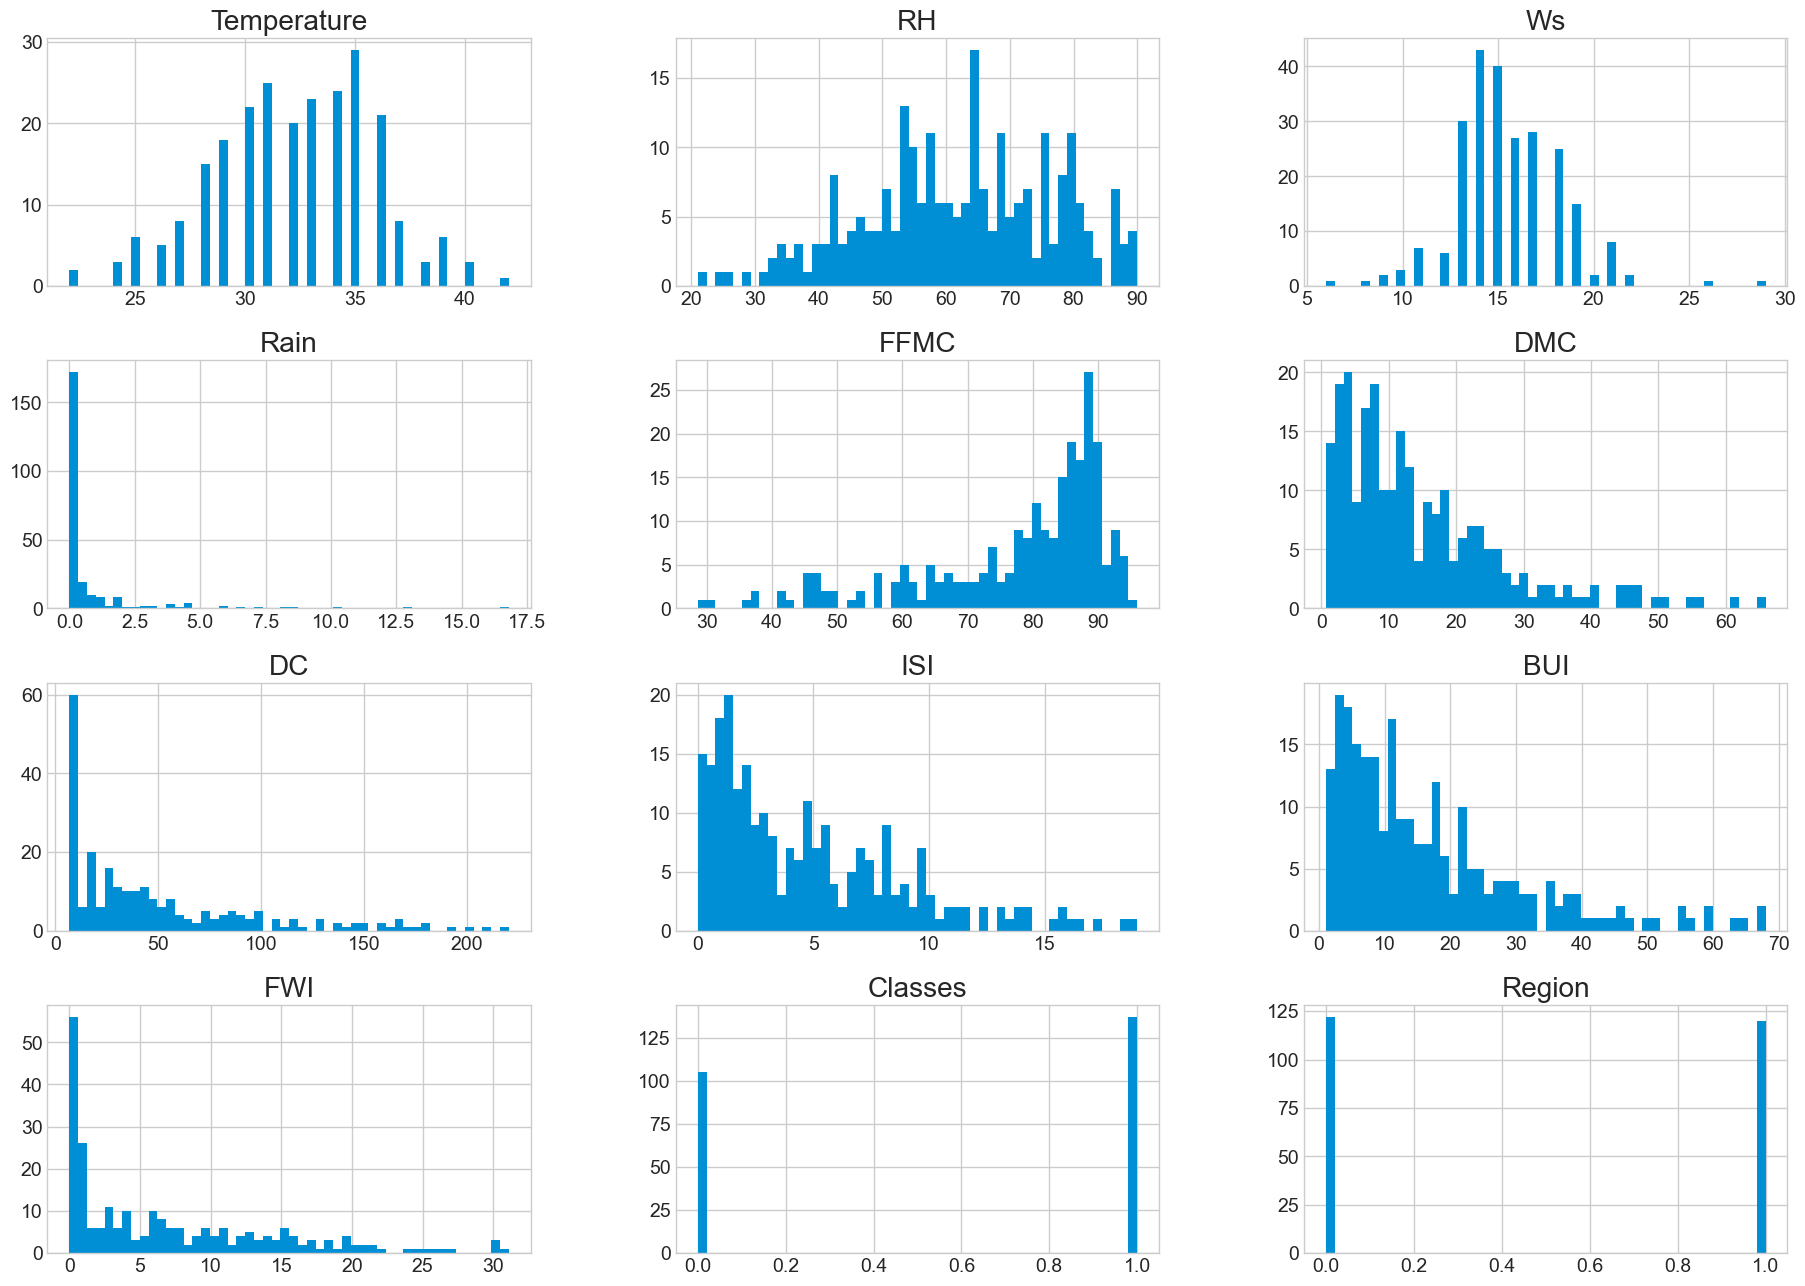

In [83]:
## Plot density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [85]:
# Percentage pie charts 
percentage = df1['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Classes')

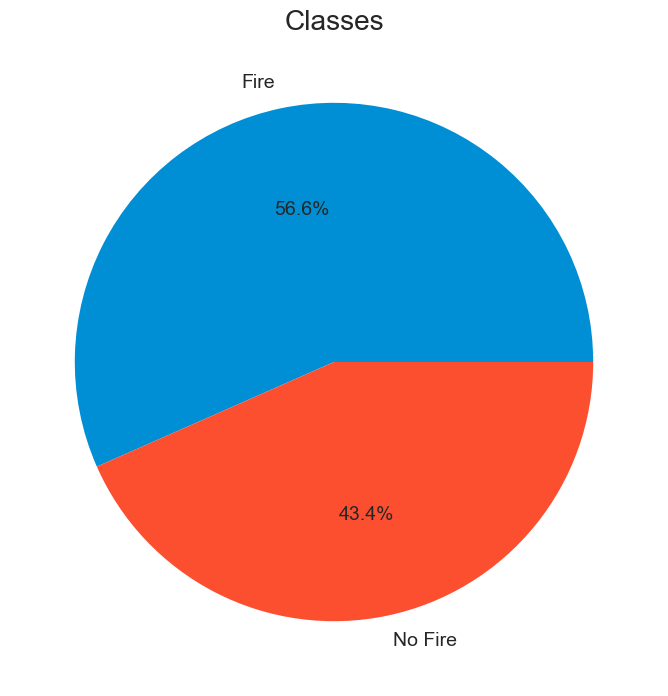

In [87]:
# plot pie charts 
class_lables = ["Fire","No Fire"]
plt.figure(figsize=(12,8))
plt.pie(percentage,labels=class_lables,autopct='%1.1f%%')
plt.title("Classes")

In [89]:
# Correlations 

In [91]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


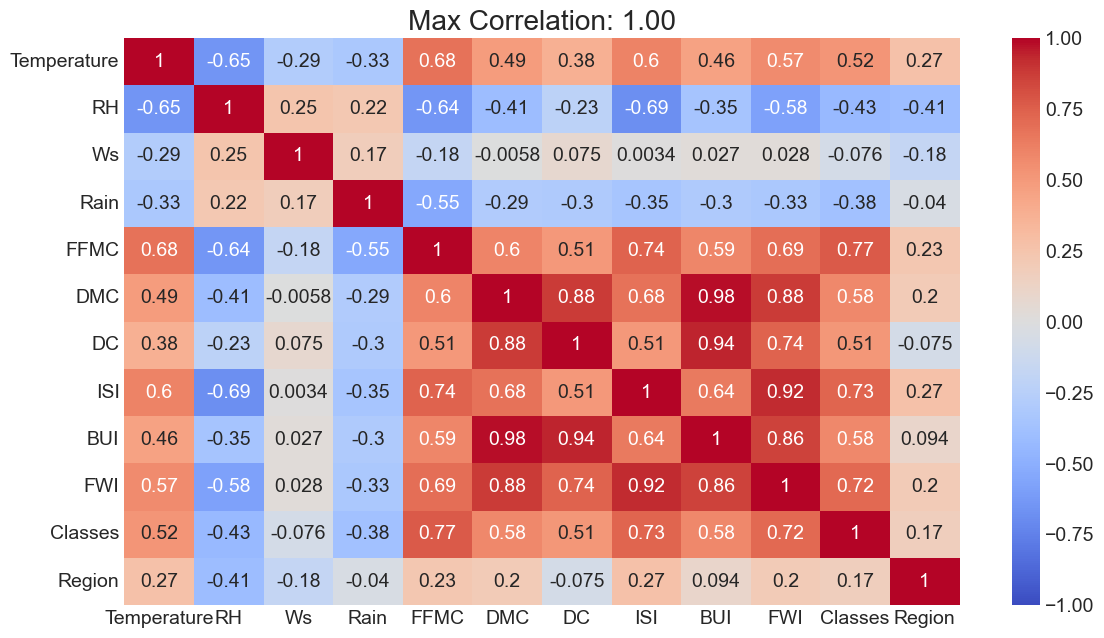

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
corr_matrix = df1.corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

# Create a heatmap with only the maximum correlation value
plt.figure(figsize=(12, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='coolwarm')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()


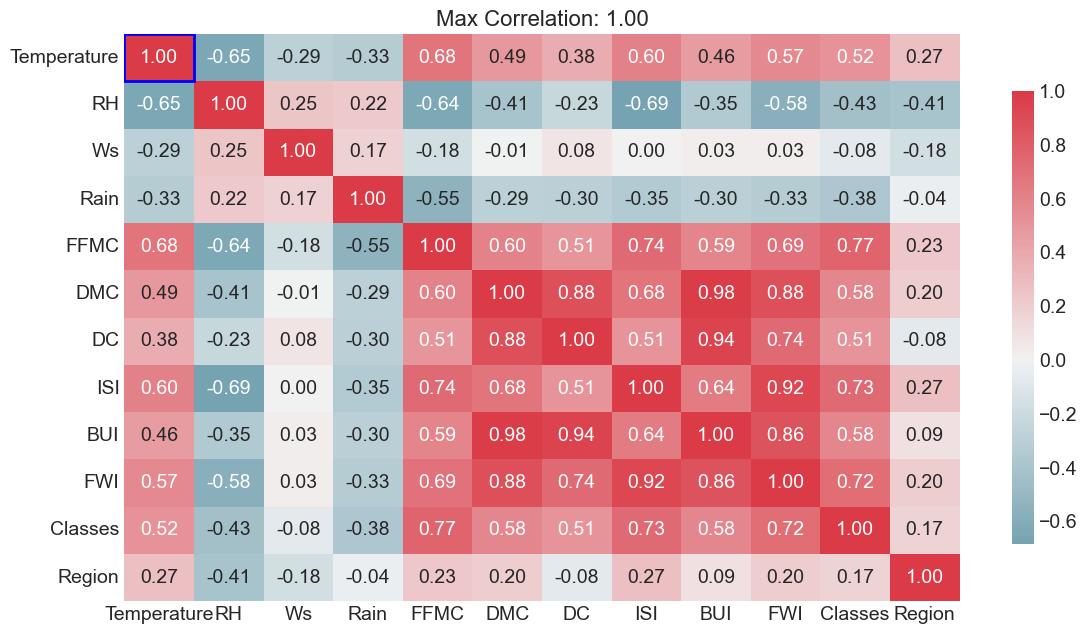

In [94]:
corr_matrix = df1.corr()

# Find the maximum correlation value and its indices
max_corr = corr_matrix.stack().max()
max_corr_indices = corr_matrix.stack().idxmax()

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Converting column names (strings) to numerical indices for the matplotlib coordinates

# Adjusting indices for matplotlib which uses zero-based indexing
# Converting column names to numerical indices
adjusted_indices = (corr_matrix.columns.get_loc(max_corr_indices[1]), corr_matrix.index.get_loc(max_corr_indices[0]))
plt.figure(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, cbar_kws={"shrink": 0.8})
plt.title(f'Max Correlation: {max_corr:.2f}', fontsize=16)

# Highlight the cell with the highest correlation value
highlighted_cell = plt.Rectangle(adjusted_indices, 1, 1, fill=False, edgecolor='blue', lw=2)
ax.add_patch(highlighted_cell)

plt.show()


<Axes: ylabel='FWI'>

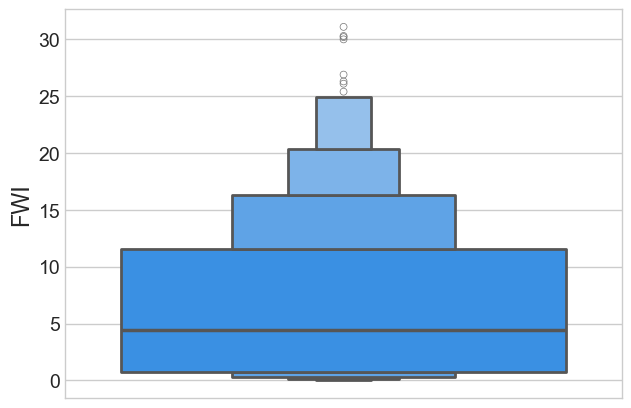

In [95]:
## Box Plot
sns.boxenplot(df1['FWI'],color='dodgerblue')

In [96]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

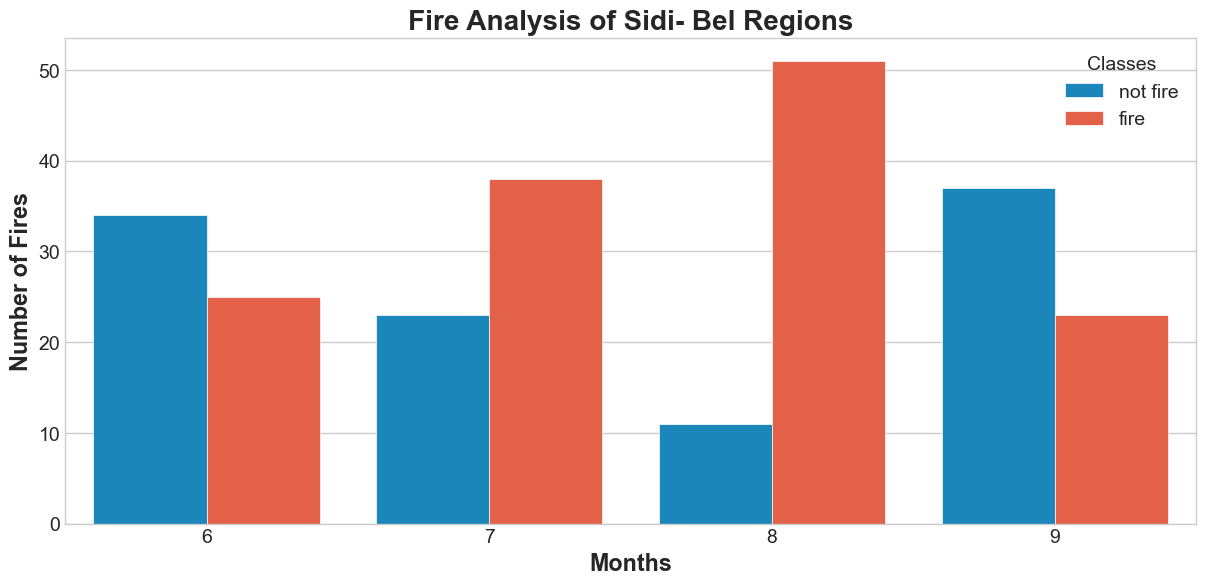

In [97]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

> Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

- Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

- Less Fires was in September

# Model Training 

In [106]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [107]:
# drop month day and year
#df.drop(columns=['day','month','year'],inplace=True)

In [110]:
df1['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

> Encoding

In [112]:
#df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [114]:
# Independent & Dependent features 
X = df1.drop('FWI',axis=1)
y = df1['FWI']

In [115]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [118]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [121]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [122]:
print(X_train.shape),print(X_test.shape)
print(y_train.shape),print(y_test.shape)


(181, 11)
(61, 11)
(181,)
(61,)


(None, None)

## Feature Selection based on Correlation


In [124]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


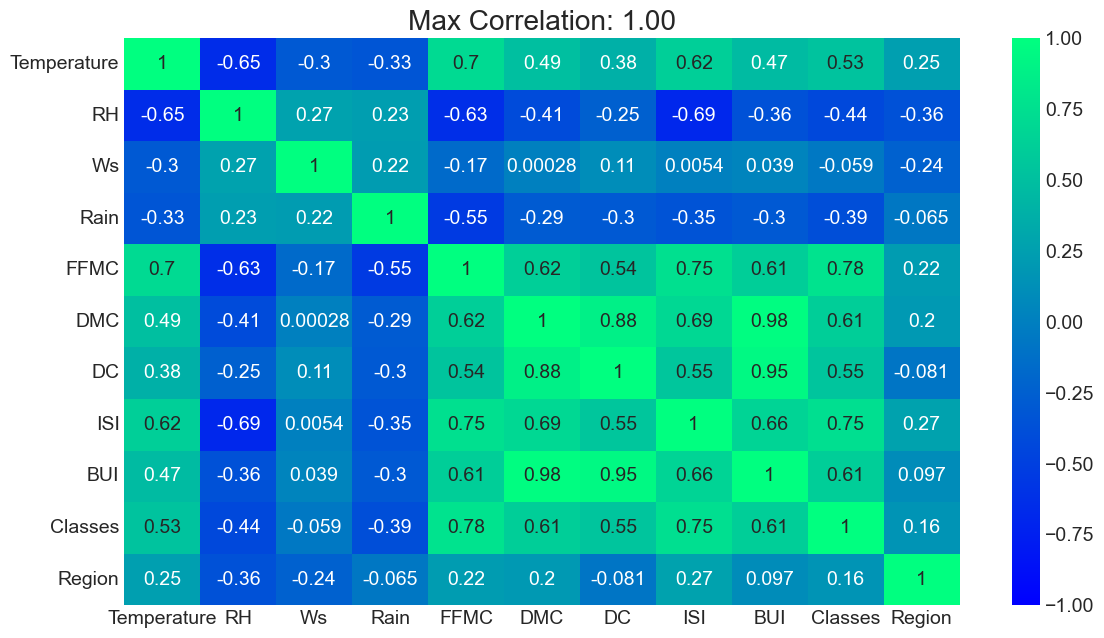

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
corr_matrix = X_train.corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

# Create a heatmap with only the maximum correlation value
plt.figure(figsize=(12, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='winter')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()

In [127]:
# Check for Multicollinearity 

In [128]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [130]:
corr_features = correlation(X_train,0.85)

In [132]:
corr_features

{'BUI', 'DC'}

In [133]:
## drop features when correlation is > 0.85 
X_train.drop(corr_features,axis=1,inplace=True)

In [137]:
X_test.drop(corr_features,axis=1,inplace=True)

In [139]:
(X_train.shape), (X_test.shape)

((181, 9), (61, 9))

# Features Scaling and Standardization 


In [143]:
from sklearn.preprocessing import StandardScaler
# Initialize Standard Scaler 
scaler = StandardScaler()
#
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [144]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

In [145]:
X_test_scaled

array([[-3.99612165e-01,  3.01399715e-01, -2.35842601e-01,
        -3.71781308e-01,  4.90403231e-01, -1.00818105e-01,
         1.62953612e-01,  7.24568837e-01, -1.01653005e+00],
       [ 2.17510419e-01, -3.95016293e-01, -9.37618146e-01,
        -3.71781308e-01,  5.99157220e-01, -4.62082981e-01,
         3.41825571e-01,  7.24568837e-01, -1.01653005e+00],
       [ 2.17510419e-01, -8.12865897e-01,  1.15045171e-01,
        -3.71781308e-01,  5.55655624e-01, -6.30113156e-01,
         4.44038119e-01,  7.24568837e-01,  9.83738754e-01],
       [ 8.34633004e-01, -4.64657894e-01,  4.65932944e-01,
        -7.25905457e-02,  1.91359477e-02,  4.45279964e-01,
        -6.03640499e-01,  7.24568837e-01,  9.83738754e-01],
       [-7.08173458e-01,  3.71041316e-01, -5.86730374e-01,
        -3.71781308e-01,  3.96149774e-01,  5.04090525e-02,
        -1.43684033e-01,  7.24568837e-01,  9.83738754e-01],
       [ 8.34633004e-01,  4.40682916e-01, -2.35842601e-01,
        -3.11943156e-01,  2.00392595e-01,  1.453461

> Box plot to understand the effect of Standard Scaler 

Text(0.5, 1.0, 'X_train After Scaling')

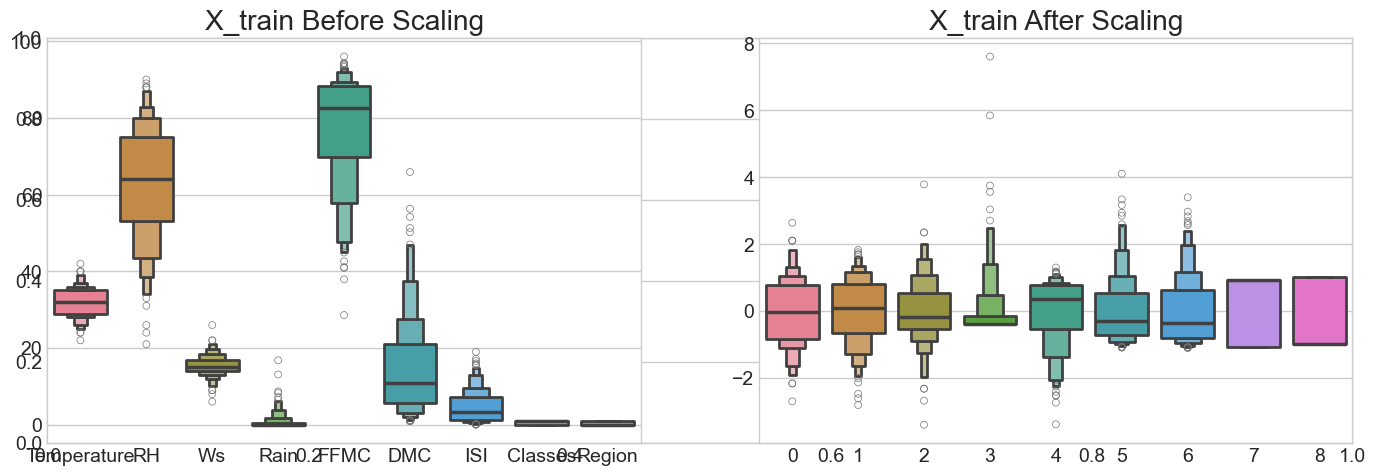

In [149]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxenplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxenplot(data=X_train_scaled)
plt.title('X_train After Scaling')

>
- We observed a lot of different outliers in different unit in X_train
- X_train_scaled has a similar unit for all after scaling 

# Model Building
- Linear Regression, 
- Lasso & Ridge regression to avoid overfitting 
- Elasticnet Regression 

Mean Absoulte Error 0.8512142101975168
R-squared score 0.9755741549678953


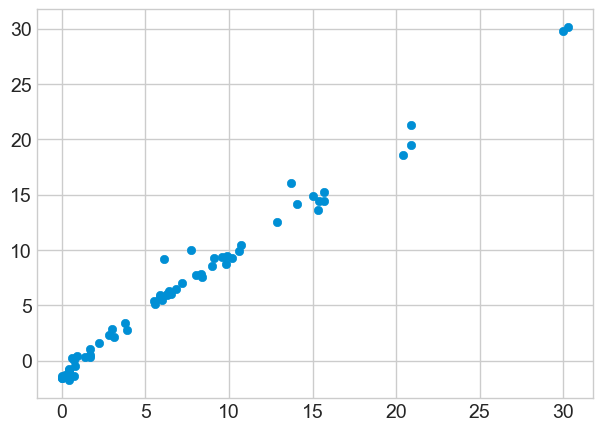

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absoulte Error {mae}")
print(f"R-squared score {score}")
plt.scatter(y_test,y_pred)


## The Mean Absolute Error (MAE) and R-squared (R²) score are both metrics commonly used to assess the performance of a predictive model, such as a regression model.

> Mean Absolute Error (MAE):

- MAE measures the average absolute difference between the actual values and the predicted values produced by your model.
- It represents the magnitude of errors in your predictions.
- Lower MAE values indicate better model performance, as they indicate that the model's predictions are closer to the actual values.

## R-squared (R²) score:

> R-squared is a statistical measure that represents the proportion of variance in the dependent variable (the variable you're trying to predict) that is explained by the independent variables (the features or inputs used in the model).
- R-squared values range from 0 to 1, with 1 indicating a perfect fit where the model explains all the variance, and 0 indicating that the model doesn't explain any variance better than simply using the mean of the dependent variable.
- Higher R-squared values generally indicate a better fit of the model to the data.

- Mean Absolute Error (MAE): 0.9939 indicates that, on average, our model's predictions are off by only 0.9939 units from the actual values. 

- This is a very low error, suggesting that your model is generally very accurate in its predictions

- R-squared score: 0.9607 signifies that our model explains 96.07% of the variance in the target variable. 

- This is an excellent score, indicating that your model captures a very large portion of the relationship between the features and the target variable.

# Lasso Regression 

Mean Absoulte Error 0.9844679399280261
R-squared score 0.9576617587983329


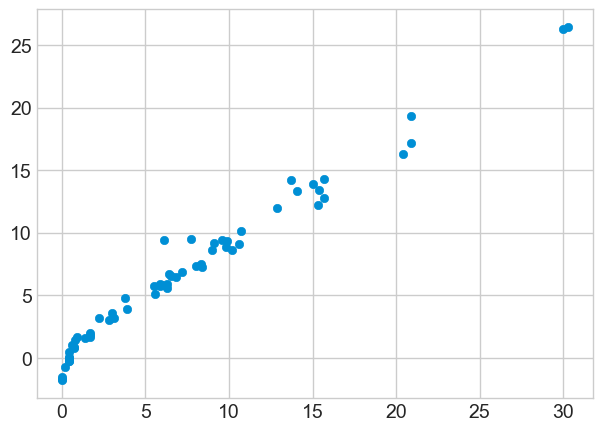

In [161]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
lasso_mae=mean_absolute_error(y_test,y_pred)
lasso_score=r2_score(y_test,y_pred)
print(f"Mean Absoulte Error {lasso_mae}")
print(f"R-squared score {lasso_score}")
plt.scatter(y_test,y_pred)


In [162]:
# Hyperparameter tuning 
# Cross Validation Lasso 
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [163]:
lassocv.alpha_

0.06481103951672902

In [164]:
lassocv.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [165]:
lassocv.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

Mean absolute error 0.8519967092892726
R2 Score 0.9741049321571345


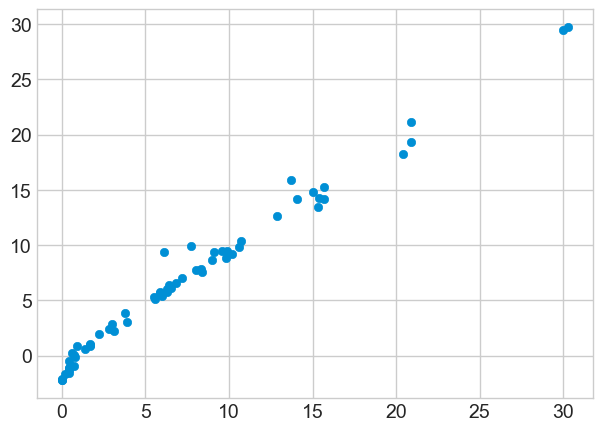

In [166]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

# Ridge Regression 

Mean Absoulte Error 0.8510293765016315
R-squared score 0.9753222396484303


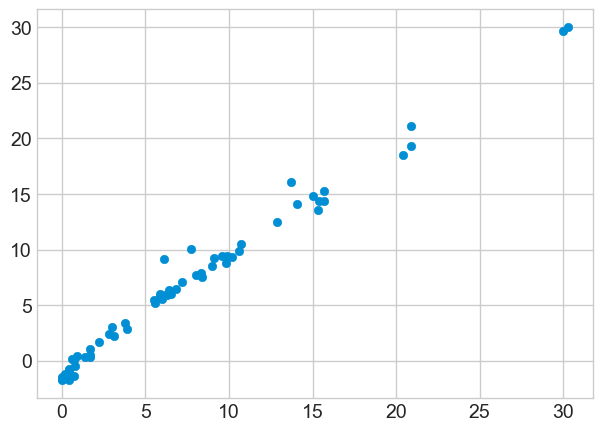

In [168]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
ridge_mae=mean_absolute_error(y_test,y_pred)
ridge_score=r2_score(y_test,y_pred)
print(f"Mean Absoulte Error {ridge_mae}")
print(f"R-squared score {ridge_score}")
plt.scatter(y_test,y_pred)

Mean absolute error 0.9422213351169713
R2 Score 0.9696263985528116


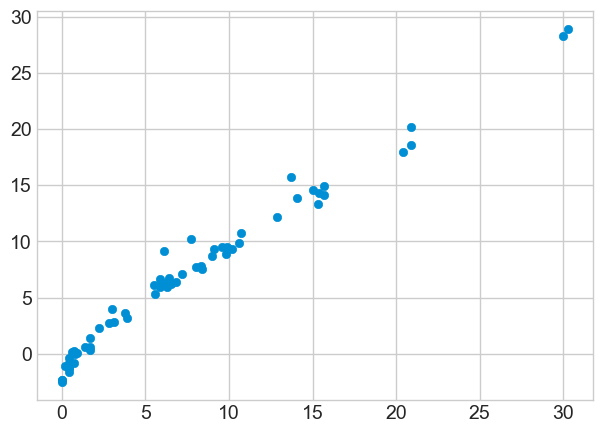

In [169]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [170]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elasticnet Regression

Mean Absoulte Error 0.8510293765016315
R-squared score 0.9753222396484303


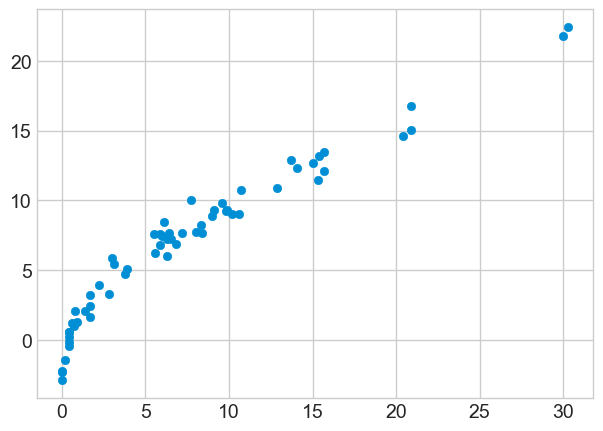

In [172]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
elastic_mae=mean_absolute_error(y_test,y_pred)
elastic_score=r2_score(y_test,y_pred)
print(f"Mean Absoulte Error {ridge_mae}")
print(f"R-squared score {ridge_score}")
plt.scatter(y_test,y_pred)

Mean absolute error 0.8697930201378541
R2 Score 0.973547652067848


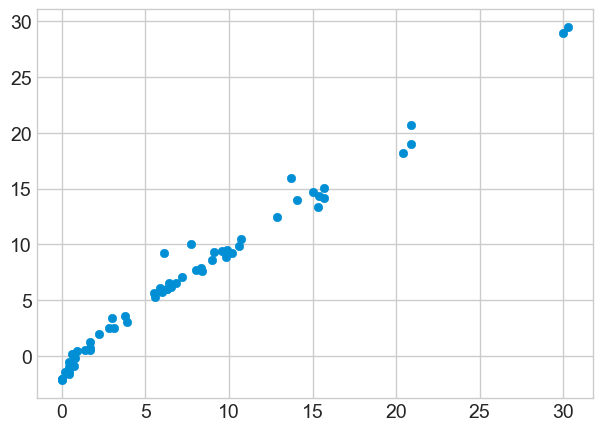

In [173]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [174]:
elasticcv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

# LASSO - RIDGE - ELASTICNET EXPLAINED!! 




- Regular Regression: Like a buffet, using all features without restrictions.
- Ridge Regression: Like a smaller plate, limiting the amount of each feature.
- LASSO Regression: Like a picky eater, choosing only the most essential features.
- Elastic Net Regression: Like a balanced meal, taking some of everything but focusing on the most important ingredients.


- Imagine you're trying to predict the price of a house based on different features like size, neighborhood, and number of bedrooms. You build a model using these features, but here's the catch:

- Regression: Too many cooks spoil the broth: Having too many features can make your model overly complex and prone to overfitting (learning the noise in the data instead of the real patterns).

- Not all heroes wear capes: Some features might be less important or even redundant, like having both "number of bedrooms" and "total living area."

- LASSO, Ridge, and Elastic Net regression are techniques to address these issues by shrinking the importance of certain features:
       - 1. Ridge Regression: Think of it as the gentle giant. It shrinks all feature weights a bit like squeezing a marshmallow - they get smaller, but none disappears completely. This reduces the influence of noisy or less important features without eliminating any entirely.
       - 2. LASSO Regression: This one's the tough cookie. It uses an absolute value penalty, like a harsh pinch. Some feature weights get shrunk to zero, effectively kicking them out of the model. This can be good for feature selection, but it can also be sensitive to data and miss potentially useful features.
       3. Elastic Net Regression: This is the diplomat, combining the strengths of Ridge and LASSO. It uses a blend of both penalties, like mixing marshmallow fluff with chocolate chips. Some features shrink and some get kicked out, depending on their importance and how correlated they are with others. This can lead to good feature selection and model stability.
       
       

In [178]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [191]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [192]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.3166
- Mean Absolute Error: 0.7450
- R2 Score: 0.9696
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0971
- Mean Absolute Error: 0.8512
- R2 Score: 0.9756


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.8023
- Mean Absolute Error: 1.2918
- R2 Score: 0.9431
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4444
- Mean Absolute Error: 0.9845
- R2 Score: 0.9577


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.3176
- Mean Absolute Error: 0.7597
- R2 Score: 0.9696
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1027
- Mean Absolute Error: 0.8510
- R2 Score: 0.9753


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4332
- Mean Absolute Error: 0.8939
- R2 Score: 0.9640
-----------------------

# Results

In [194]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.975574
2,Ridge,0.975322
1,Lasso,0.957662
7,CatBoosting Regressor,0.953741
8,AdaBoost Regressor,0.927908
5,Random Forest Regressor,0.927742
3,K-Neighbors Regressor,0.922313
6,XGBRegressor,0.921895
4,Decision Tree,0.891663


# Difference between Actaul & Predicted values

In [200]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
24,8.4,7.599076,0.800924
6,7.2,7.071060,0.128940
152,6.4,6.519512,-0.119512
209,5.9,6.136246,-0.236246
237,6.5,6.213612,0.286388
...,...,...,...
162,9.6,9.421223,0.178777
177,9.0,8.642274,0.357726
223,3.9,3.071991,0.828009
229,15.4,14.301907,1.098093
